In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/english-premier-league-and-championship-full-dataset/England CSV.csv
/kaggle/input/english-premier-league-and-championship-full-dataset/England 2 CSV.csv


In [2]:
pl_table = pd.read_csv("/kaggle/input/english-premier-league-and-championship-full-dataset/England CSV.csv")
pl_table

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,T Harrington,5.0,11.0,3.0,5.0,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116,Premier League
1,16/01/2025,2024/25,Man United,Southampton,3,1,H,0.0,1.0,A,J Brooks,23.0,13.0,9.0,5.0,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116,Premier League
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,A,0.0,0.0,D,S Barrott,10.0,11.0,3.0,3.0,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0,20250115,Premier League
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,A Madley,21.0,9.0,4.0,4.0,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,20250115,Premier League
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,H,1.0,0.0,H,D England,17.0,13.0,5.0,7.0,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0,20250115,Premier League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12148,14/08/1993,1993/94,Southampton,Everton,0,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12149,14/08/1993,1993/94,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12150,14/08/1993,1993/94,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12151,14/08/1993,1993/94,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League


Step 1: Understand the data
* DataFrame Shape
* Head and Tail
* dtypes
* describe

In [3]:
pl_table.shape

(12153, 25)

In [4]:
pl_table.head(10)


,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,T Harrington,5.0,11.0,3.0,5.0,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116,Premier League
1,16/01/2025,2024/25,Man United,Southampton,3,1,H,0.0,1.0,A,J Brooks,23.0,13.0,9.0,5.0,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116,Premier League
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,A,0.0,0.0,D,S Barrott,10.0,11.0,3.0,3.0,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0,20250115,Premier League
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,A Madley,21.0,9.0,4.0,4.0,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,20250115,Premier League
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,H,1.0,0.0,H,D England,17.0,13.0,5.0,7.0,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0,20250115,Premier League
5,15/01/2025,2024/25,Arsenal,Tottenham,2,1,H,2.0,1.0,H,S Hooper,14.0,10.0,4.0,2.0,16.0,9.0,10.0,4.0,3.0,1.0,0.0,0.0,20250115,Premier League
6,14/01/2025,2024/25,Brentford,Man City,2,2,D,0.0,0.0,D,A Taylor,18.0,21.0,6.0,8.0,4.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0,20250114,Premier League
7,14/01/2025,2024/25,Chelsea,Bournemouth,2,2,D,1.0,0.0,H,R Jones,26.0,7.0,10.0,3.0,15.0,16.0,9.0,3.0,2.0,3.0,0.0,0.0,20250114,Premier League
8,14/01/2025,2024/25,West Ham,Fulham,3,2,H,2.0,0.0,H,C Pawson,4.0,21.0,3.0,5.0,9.0,18.0,0.0,3.0,3.0,3.0,0.0,0.0,20250114,Premier League
9,14/01/2025,2024/25,Nott'm Forest,Liverpool,1,1,D,1.0,0.0,H,C Kavanagh,6.0,23.0,3.0,7.0,7.0,10.0,0.0,9.0,2.0,1.0,0.0,0.0,20250114,Premier League


In [5]:
pl_table.tail(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
12148,14/08/1993,1993/94,Southampton,Everton,0,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12149,14/08/1993,1993/94,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12150,14/08/1993,1993/94,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12151,14/08/1993,1993/94,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12152,14/08/1993,1993/94,Oldham,Ipswich,0,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League


In [6]:
pl_table.columns

Index(['Date', 'Season', 'HomeTeam', 'AwayTeam', 'FTH Goals', 'FTA Goals',
       'FT Result', 'HTH Goals', 'HTA Goals', 'HT Result', 'Referee',
       'H Shots', 'A Shots', 'H SOT', 'A SOT', 'H Fouls', 'A Fouls',
       'H Corners', 'A Corners', 'H Yellow', 'A Yellow', 'H Red', 'A Red',
       'Display_Order', 'League'],
      dtype='object')

In [7]:
pl_table.dtypes 

Date              object
Season            object
HomeTeam          object
AwayTeam          object
FTH Goals          int64
FTA Goals          int64
FT Result         object
HTH Goals        float64
HTA Goals        float64
HT Result         object
Referee           object
H Shots          float64
A Shots          float64
H SOT            float64
A SOT            float64
H Fouls          float64
A Fouls          float64
H Corners        float64
A Corners        float64
H Yellow         float64
A Yellow         float64
H Red            float64
A Red            float64
Display_Order      int64
League            object
dtype: object

In [8]:
pl_table.describe()

,FTH Goals,FTA Goals,HTH Goals,HTA Goals,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order
count,12153.000000,12153.000000,11229.000000,11229.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,1.215300e+04
mean,1.531309,1.160948,0.689554,0.511265,13.618716,10.784543,6.007503,4.704684,11.303462,11.781113,6.056383,4.770715,1.462536,1.785722,0.062386,0.085968,2.008629e+07
std,1.306927,1.147714,0.838796,0.731610,5.349420,4.678710,3.275177,2.757288,3.752442,3.931377,3.107327,2.746754,1.215747,1.285168,0.252706,0.291579,9.224046e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.993081e+07
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,9.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.001010e+07
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,11.000000,12.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.009012e+07
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,14.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000,2.017012e+07
max,9.000000,9.000000,5.000000,5.000000,43.000000,31.000000,24.000000,20.000000,33.000000,29.000000,20.000000,19.000000,7.000000,9.000000,3.000000,2.000000,2.025012e+07


In [9]:
#check for null values
pl_table.isna().sum()

Date                0
Season              0
HomeTeam            0
AwayTeam            0
FTH Goals           0
FTA Goals           0
FT Result           0
HTH Goals         924
HTA Goals         924
HT Result         924
Referee          2824
H Shots          2824
A Shots          2824
H SOT            2824
A SOT            2824
H Fouls          2824
A Fouls          2824
H Corners        2824
A Corners        2824
H Yellow         2824
A Yellow         2824
H Red            2824
A Red            2824
Display_Order       0
League              0
dtype: int64

In [10]:
pl_table_subset = pl_table[['Date', 'Season', 'HomeTeam', 'AwayTeam', 'FTH Goals', 'FTA Goals',
       'FT Result', 'HTH Goals', 'HTA Goals', 'HT Result', 'Referee',
       'H Shots', 'A Shots', 'H SOT', 'A SOT', 'H Fouls', 'A Fouls',
       'H Corners', 'A Corners', 'H Yellow', 'A Yellow', 'H Red', 'A Red',]]

pl_table_subset.head()

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,T Harrington,5.0,11.0,3.0,5.0,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0
1,16/01/2025,2024/25,Man United,Southampton,3,1,H,0.0,1.0,A,J Brooks,23.0,13.0,9.0,5.0,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,A,0.0,0.0,D,S Barrott,10.0,11.0,3.0,3.0,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,A Madley,21.0,9.0,4.0,4.0,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,H,1.0,0.0,H,D England,17.0,13.0,5.0,7.0,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0


In [11]:
#pl_table_subset.loc[:, 'Date']= pd.to_datetime(pl_table_subset['Date'], format='%d/%m/%Y')
#pl_table_subset['Date'] = pd.to_datetime(pl_table_subset['Date'])

#pl_table_subset.loc[:, 'Date']= pd.to_datetime(pl_table_subset['Date'], format='%d/%m/%Y')

pl_table_subset['Date'] = pd.to_datetime(pl_table_subset['Date'], format='%d/%m/%Y')


<ipython-input-11-e980c31e759f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl_table_subset['Date'] = pd.to_datetime(pl_table_subset['Date'], format='%d/%m/%Y')


In [12]:
pl_table_subset.dtypes

Date         datetime64[ns]
Season               object
HomeTeam             object
AwayTeam             object
FTH Goals             int64
FTA Goals             int64
FT Result            object
HTH Goals           float64
HTA Goals           float64
HT Result            object
Referee              object
H Shots             float64
A Shots             float64
H SOT               float64
A SOT               float64
H Fouls             float64
A Fouls             float64
H Corners           float64
A Corners           float64
H Yellow            float64
A Yellow            float64
H Red               float64
A Red               float64
dtype: object

In [13]:
pl_table_subset.loc[pl_table_subset.duplicated()]

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red


In [14]:
pl_table_subset.isna().sum()

Date            0
Season          0
HomeTeam        0
AwayTeam        0
FTH Goals       0
FTA Goals       0
FT Result       0
HTH Goals     924
HTA Goals     924
HT Result     924
Referee      2824
H Shots      2824
A Shots      2824
H SOT        2824
A SOT        2824
H Fouls      2824
A Fouls      2824
H Corners    2824
A Corners    2824
H Yellow     2824
A Yellow     2824
H Red        2824
A Red        2824
dtype: int64

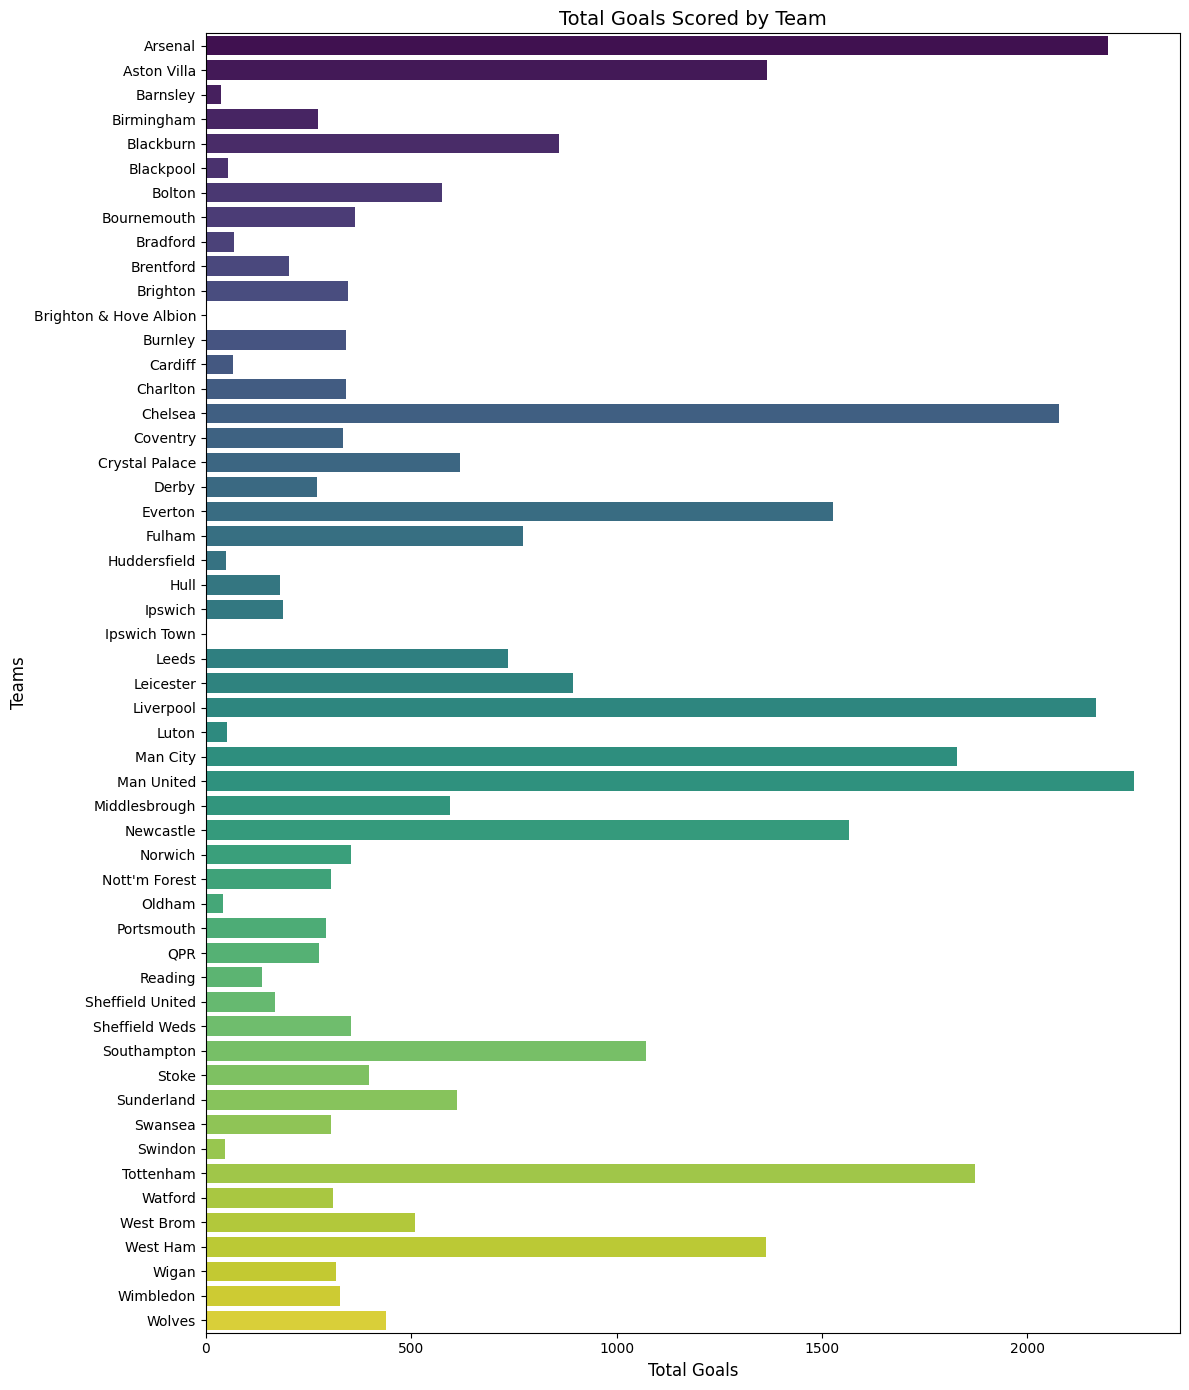

In [15]:
home_goals = pl_table.groupby('HomeTeam')['FTH Goals'].sum()
away_goals = pl_table.groupby('AwayTeam')['FTA Goals'].sum()
total_goals = pd.concat([home_goals, away_goals], axis=1).fillna(0)



# Create a new column witht the total, setting axis to one, uses the row
total_goals['Total'] = total_goals.sum(axis=1) # Sum home + away goals


# Reset index to turn team names into a column, seaborn needs a column for the y axis, currenty team is the index. We'll need to reindex the df
total_goals = total_goals.reset_index().rename(columns={'index': 'Team'})


# Set figure size (reduce height for better readability)
plt.figure(figsize=(12, 14))

# Create the barplot
sns.barplot(
    data=total_goals, 
    y='Team', 
    x='Total', 
    palette='viridis'  # Use a single palette for better clarity
)

# Titles and labels
plt.title('Total Goals Scored by Team', fontsize=14)
plt.xlabel('Total Goals', fontsize=12)
plt.ylabel('Teams', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


Question I want to answer how many goals were scored by decade

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

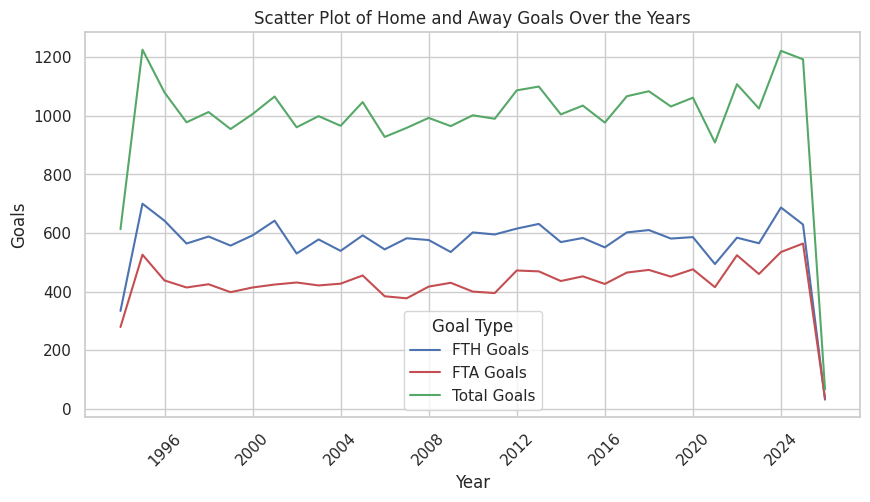

In [16]:
#pl_table_subset.loc[:,'Decade'] = ((pl_table_subset['Date'].dt.year - 1990) // 10 ) * 10 + 1990
data = pl_table_subset.groupby(pd.Grouper(key='Date', axis=0, freq='YE'))['FTH Goals'].sum()
data_away = pl_table_subset.groupby(pd.Grouper(key='Date', axis=0, freq='YE'))['FTA Goals'].sum()
goals_by_decade = pd.concat([data, data_away], axis=1).fillna(0)
goals_by_decade["Total Goals"] = goals_by_decade['FTH Goals'] + goals_by_decade['FTA Goals']
goals_by_decade = goals_by_decade.reset_index().rename(columns={"index": "Date"})



df_melted = goals_by_decade.melt(id_vars=["Date"], var_name="Goal Type", value_name="Goals")

# Set seaborn style
sns.set_theme(style="whitegrid")

# Create the scatter plot with correct hue
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_melted, x="Date", y="Goals", hue="Goal Type", palette={"FTH Goals": "b", "FTA Goals": "r", "Total Goals": "g"})

# Customize labels and title
plt.xlabel("Year")
plt.ylabel("Goals")
plt.title("Scatter Plot of Home and Away Goals Over the Years")
plt.xticks(rotation=45)

# Show the plot
plt.show()

I want to check which refs call the most amount of fouls now
I'll be removing all the games where the ref is null
12153 rows total, 2824 games dont have a ref 


In [17]:
pl_table_subset.loc[(pl_table_subset['Referee'].isna())]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red
9329,2000-05-14,1999/00,Everton,Middlesbrough,0,2,A,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9330,2000-05-14,1999/00,Southampton,Wimbledon,2,0,H,0.0,0.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9331,2000-05-14,1999/00,Newcastle,Arsenal,4,2,H,2.0,1.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9332,2000-05-14,1999/00,Bradford,Liverpool,1,0,H,1.0,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9333,2000-05-14,1999/00,Watford,Coventry,1,0,H,1.0,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12148,1993-08-14,1993/94,Southampton,Everton,0,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12149,1993-08-14,1993/94,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12150,1993-08-14,1993/94,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12151,1993-08-14,1993/94,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
pl_ref = pl_table_subset.dropna(subset='Referee')
pl_ref

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red
0,2025-01-16,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,T Harrington,5.0,11.0,3.0,5.0,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0
1,2025-01-16,2024/25,Man United,Southampton,3,1,H,0.0,1.0,A,J Brooks,23.0,13.0,9.0,5.0,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0
2,2025-01-15,2024/25,Everton,Aston Villa,0,1,A,0.0,0.0,D,S Barrott,10.0,11.0,3.0,3.0,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0
3,2025-01-15,2024/25,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,A Madley,21.0,9.0,4.0,4.0,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0
4,2025-01-15,2024/25,Newcastle,Wolves,3,0,H,1.0,0.0,H,D England,17.0,13.0,5.0,7.0,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9324,2000-08-19,2000/01,Leicester,Aston Villa,0,0,D,0.0,0.0,D,Mike Riley,5.0,5.0,4.0,3.0,12.0,12.0,5.0,4.0,2.0,3.0,0.0,0.0
9325,2000-08-19,2000/01,Leeds,Everton,2,0,H,2.0,0.0,H,Dermot Gallagher,17.0,12.0,8.0,6.0,21.0,20.0,6.0,4.0,1.0,3.0,0.0,0.0
9326,2000-08-19,2000/01,Derby,Southampton,2,2,D,1.0,2.0,A,Andy D'Urso,6.0,13.0,4.0,6.0,11.0,13.0,5.0,8.0,1.0,1.0,0.0,0.0
9327,2000-08-19,2000/01,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,Barry Knight,6.0,16.0,3.0,9.0,15.0,21.0,8.0,4.0,5.0,3.0,1.0,0.0


In [19]:
#ref_stats = pl_ref.groupby('Referee')[['H Fouls', 'A Fouls', 'H Yellow', 'A Yellow', 'H Red', 'A Red']].sum()
ref_stats = pl_table_subset.groupby('Referee').agg(
    Total_Home_Fouls=('H Fouls', 'sum'),
    Total_Away_Fouls=('A Fouls', 'sum'),
    Total_Home_Yellows=('H Yellow', 'sum'),
    Total_Away_Yellows=('A Yellow', 'sum'),
    Total_Home_Reds=('H Red','sum'),
    Total_Away_Reds=('A Red', 'sum'),
    Game_Count=('Referee', 'count')  # Counting occurrences of each referee
).reset_index()

In [20]:
ref_stats.describe()

,Total_Home_Fouls,Total_Away_Fouls,Total_Home_Yellows,Total_Away_Yellows,Total_Home_Reds,Total_Away_Reds,Game_Count
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,623.964497,650.331361,80.733728,98.573964,3.443787,4.745562,55.201183
std,1087.098760,1120.888151,152.363581,177.025142,6.566381,9.621423,98.737723
min,6.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,50.000000,48.000000,5.000000,7.000000,0.000000,0.000000,4.000000
50%,143.000000,142.000000,14.000000,19.000000,1.000000,1.000000,11.000000
75%,504.000000,513.000000,64.000000,81.000000,3.000000,4.000000,45.000000
max,5948.000000,5962.000000,948.000000,999.000000,38.000000,70.000000,529.000000


In [21]:
ref_stats

,Referee,Total_Home_Fouls,Total_Away_Fouls,Total_Home_Yellows,Total_Away_Yellows,Total_Home_Reds,Total_Away_Reds,Game_Count
0,A D'Urso,652.0,761.0,64.0,104.0,5.0,5.0,56
1,A Madley,1120.0,1218.0,147.0,190.0,6.0,4.0,101
2,A Marriner,4033.0,4122.0,557.0,669.0,24.0,37.0,392
3,A Moss,8.0,12.0,1.0,3.0,0.0,0.0,1
4,A Taylor,4200.0,4022.0,678.0,695.0,30.0,23.0,390
...,...,...,...,...,...,...,...,...
164,H Webb,12.0,12.0,1.0,1.0,0.0,0.0,1
165,M Atkinson,8.0,9.0,1.0,1.0,0.0,0.0,1
166,N Barry,8.0,20.0,1.0,0.0,0.0,0.0,1
167,S Dunn,15.0,11.0,2.0,1.0,0.0,0.0,1


In [22]:
ref_stats.sort_values(by=['Game_Count'],ascending=False)

,Referee,Total_Home_Fouls,Total_Away_Fouls,Total_Home_Yellows,Total_Away_Yellows,Total_Home_Reds,Total_Away_Reds,Game_Count
80,M Dean,5948.0,5962.0,948.0,999.0,38.0,70.0,529
78,M Atkinson,4838.0,5265.0,665.0,822.0,29.0,38.0,459
2,A Marriner,4033.0,4122.0,557.0,669.0,24.0,37.0,392
85,M Oliver,4215.0,4294.0,600.0,661.0,24.0,28.0,390
4,A Taylor,4200.0,4022.0,678.0,695.0,30.0,23.0,390
...,...,...,...,...,...,...,...,...
89,M. D. Messias,11.0,24.0,0.0,4.0,0.0,0.0,1
30,D Gallagh,18.0,12.0,0.0,0.0,0.0,0.0,1
11,Andy Hall,17.0,15.0,2.0,1.0,0.0,1.0,1
147,"Styles, R",7.0,11.0,1.0,1.0,0.0,0.0,1


I'll want to add up all the values and check the percentage increase from away - to home 



In [23]:


# Calculate percentage increase for each referee
ref_stats['Foul_Percentage_Increase'] = ((ref_stats['Total_Away_Fouls'] - ref_stats['Total_Home_Fouls']) / ref_stats['Total_Home_Fouls']) * 100
ref_stats['Yellow_Percentage_Increase'] = ((ref_stats['Total_Away_Yellows'] - ref_stats['Total_Home_Yellows']) / ref_stats['Total_Home_Yellows']) * 100

# Calculate totals for all referees
totals = ref_stats[['Total_Home_Fouls', 'Total_Away_Fouls', 'Total_Home_Yellows', 'Total_Away_Yellows', 
                    'Total_Home_Reds', 'Total_Away_Reds', 'Game_Count']].sum()

# Calculate percentage increase for the total values
total_foul_percentage_increase = ((totals['Total_Away_Fouls'] - totals['Total_Home_Fouls']) / totals['Total_Home_Fouls']) * 100
total_yellow_percentage_increase = ((totals['Total_Away_Yellows'] - totals['Total_Home_Yellows']) / totals['Total_Home_Yellows']) * 100

# Create a DataFrame for total values
totals_df = pd.DataFrame({
    'Referee': ['TOTAL'],
    'Total_Home_Fouls': [totals['Total_Home_Fouls']],
    'Total_Away_Fouls': [totals['Total_Away_Fouls']],
    'Foul_Percentage_Increase': [total_foul_percentage_increase],
    'Total_Home_Yellows': [totals['Total_Home_Yellows']],
    'Total_Away_Yellows': [totals['Total_Away_Yellows']],
    'Yellow_Percentage_Increase': [total_yellow_percentage_increase],
    'Total_Home_Reds': [totals['Total_Home_Reds']],
    'Total_Away_Reds': [totals['Total_Away_Reds']],
    'Game_Count': [totals['Game_Count']]
})

# Append the totals row to the original DataFrame
ref_stats_with_totals = pd.concat([ref_stats, totals_df], ignore_index=True)

# Display the result
ref_stats_with_totals.sort_values(by='Game_Count', ascending=False)



,Referee,Total_Home_Fouls,Total_Away_Fouls,Total_Home_Yellows,Total_Away_Yellows,Total_Home_Reds,Total_Away_Reds,Game_Count,Foul_Percentage_Increase,Yellow_Percentage_Increase
169,TOTAL,105450.0,109906.0,13644.0,16659.0,582.0,802.0,9329.0,4.225699,22.097625
80,M Dean,5948.0,5962.0,948.0,999.0,38.0,70.0,529.0,0.235373,5.379747
78,M Atkinson,4838.0,5265.0,665.0,822.0,29.0,38.0,459.0,8.825961,23.609023
2,A Marriner,4033.0,4122.0,557.0,669.0,24.0,37.0,392.0,2.206794,20.107720
85,M Oliver,4215.0,4294.0,600.0,661.0,24.0,28.0,390.0,1.874259,10.166667
...,...,...,...,...,...,...,...,...,...,...
61,I Williamson,8.0,18.0,2.0,4.0,1.0,0.0,1.0,125.000000,100.000000
147,"Styles, R",7.0,11.0,1.0,1.0,0.0,0.0,1.0,57.142857,0.000000
3,A Moss,8.0,12.0,1.0,3.0,0.0,0.0,1.0,50.000000,200.000000
44,"Durkin, P.",12.0,13.0,0.0,2.0,0.0,1.0,1.0,8.333333,inf
